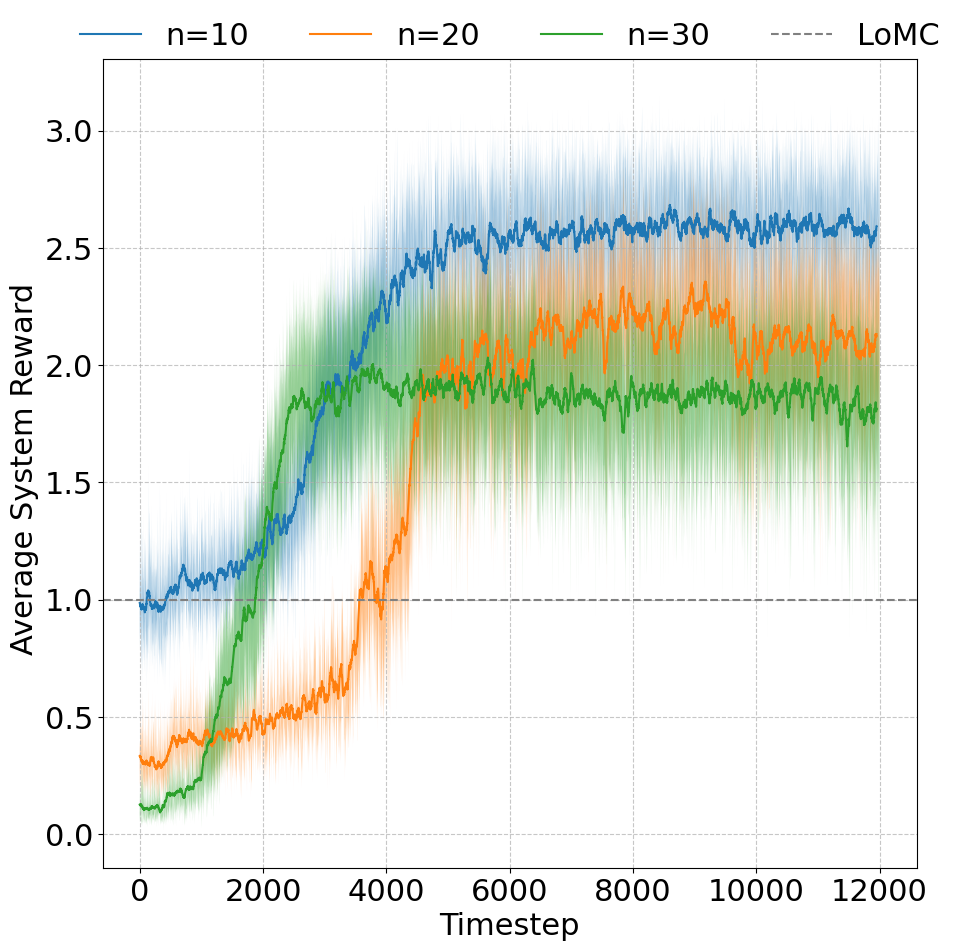

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n1 = 10
n2 = 20
n3 = 30
t1 = 10
t2 = 10
t3 = 10
z_level= 1

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

    s_dev = np.std(steps_to_complete, axis=0)


# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n1}t{t1}_cum_rew.npy')
mean1 = np.mean(cum_rew_1, axis=0) # average over sims
s_dev1 = np.std(cum_rew_1, axis=0)
lower_bound1 = mean1 - z_level * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))
upper_bound1 = mean1 + z_level  * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))

cum_rew_2 = np.load(f'data/base_comm/n{n2}t{t2}_cum_rew.npy')
mean2 = np.mean(cum_rew_2, axis=0) # average over sims
s_dev2 = np.std(cum_rew_2, axis=0)
lower_bound2 = mean2 - z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))
upper_bound2 = mean2 + z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))

cum_rew_3 = np.load(f'data/base_comm/n{n3}t{t3}_cum_rew.npy')
mean3 = np.mean(cum_rew_3, axis=0) # average over sims
s_dev3 = np.std(cum_rew_3, axis=0)
lower_bound3 = mean3 - z_level  * (s_dev3 / np.sqrt(cum_rew_3.shape[0]))
upper_bound3 = mean3 + z_level  * (s_dev3 / np.sqrt(cum_rew_3.shape[0]))



plt.plot(moving_average(mean1,50), label='n=10')
plt.plot(moving_average(mean2,50), label='n=20')
plt.plot(moving_average(mean3,50), label='n=30')
plt.fill_between(range(len(mean1)), lower_bound1, upper_bound1, alpha=0.5)
plt.fill_between(range(len(mean2)), lower_bound2, upper_bound2, alpha=0.5)
plt.fill_between(range(len(mean3)), lower_bound3, upper_bound3, alpha=0.5)



plt.xlabel('Timestep', fontsize=22)
plt.ylabel('Average System Reward ', fontsize=22)
plt.xticks(fontsize=22)  # Adjust the fontsize as needed
plt.yticks(fontsize=22)  # Adjust the fontsize as needed
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.axhline(y=1, color='grey', linestyle='--', linewidth=1.5, label='LoMC')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), fontsize=22, ncol=4,frameon =False )
plt.grid(True, linestyle='--', alpha=0.7)


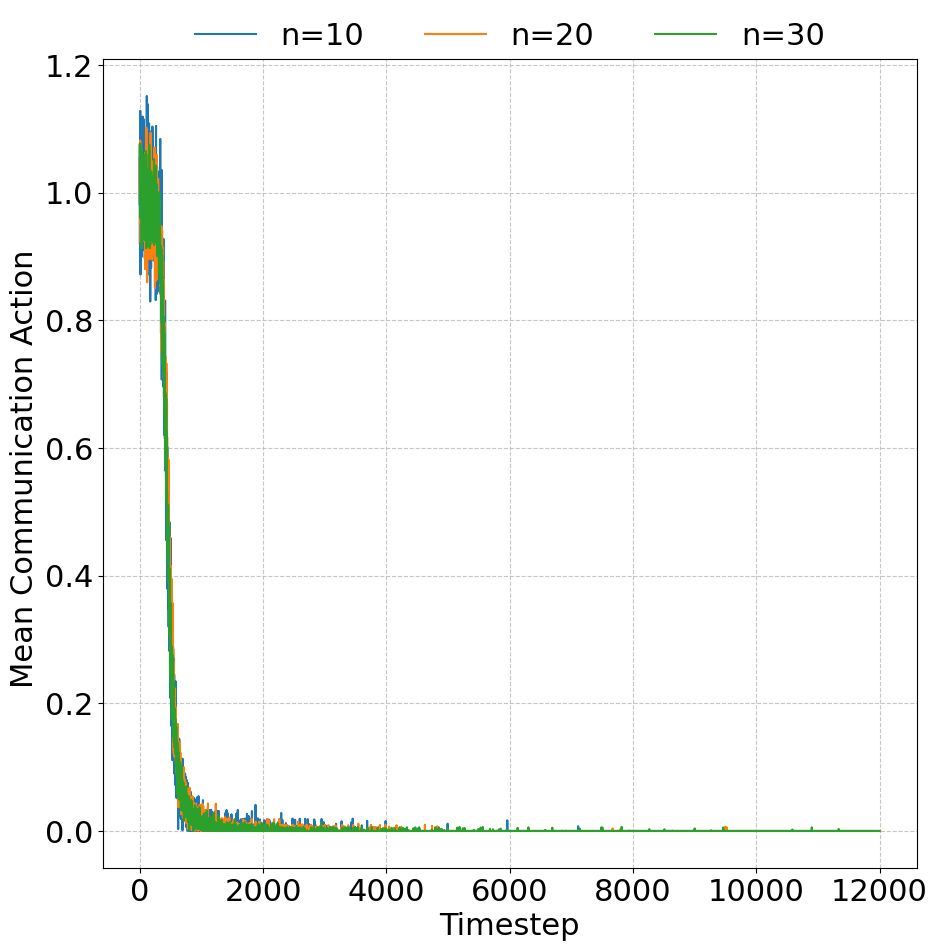

In [47]:
actions_1 = np.load(f'data/base_comm/n{n1}t{t1}_actions.npy')
actions_2 = np.load(f'data/base_comm/n{n2}t{t2}_actions.npy')
actions_3 = np.load(f'data/base_comm/n{n3}t{t3}_actions.npy')

fig, ax_main = plt.subplots()

average_actions1 = np.mean(actions_1, axis=0)
average_action1 = np.mean(average_actions1, axis=1)
ax_main.plot(moving_average(average_action1,1), label='n=10')

average_actions2 = np.mean(actions_2, axis=0)
average_action2 = np.mean(average_actions2, axis=1)
ax_main.plot(moving_average(average_action2,1), label='n=20')

average_actions3 = np.mean(actions_3, axis=0)
average_action3 = np.mean(average_actions3, axis=1)
ax_main.plot(moving_average(average_action3, 1), label='n=30')


plt.xlabel('Timestep', fontsize=22)
plt.ylabel('Mean Communication Action ', fontsize=22)
plt.xticks(fontsize=22)  # Adjust the fontsize as needed
plt.yticks(fontsize=22)  # Adjust the fontsize as needed
fig.set_size_inches(10.5, 10.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), fontsize=22, ncol=4,frameon =False )
plt.grid(True, linestyle='--', alpha=0.7)



In [48]:
struct_1 = np.load(f'data/base_comm/n{n1}t{t1}_cstruct.npy')

sets_list = [set([f'{i+1}' for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)



[{'4', '10', '6', '3'}, set(), set(), set(), set(), set(), set(), set(), set(), {'8', '7', '5', '9', '1', '2'}]


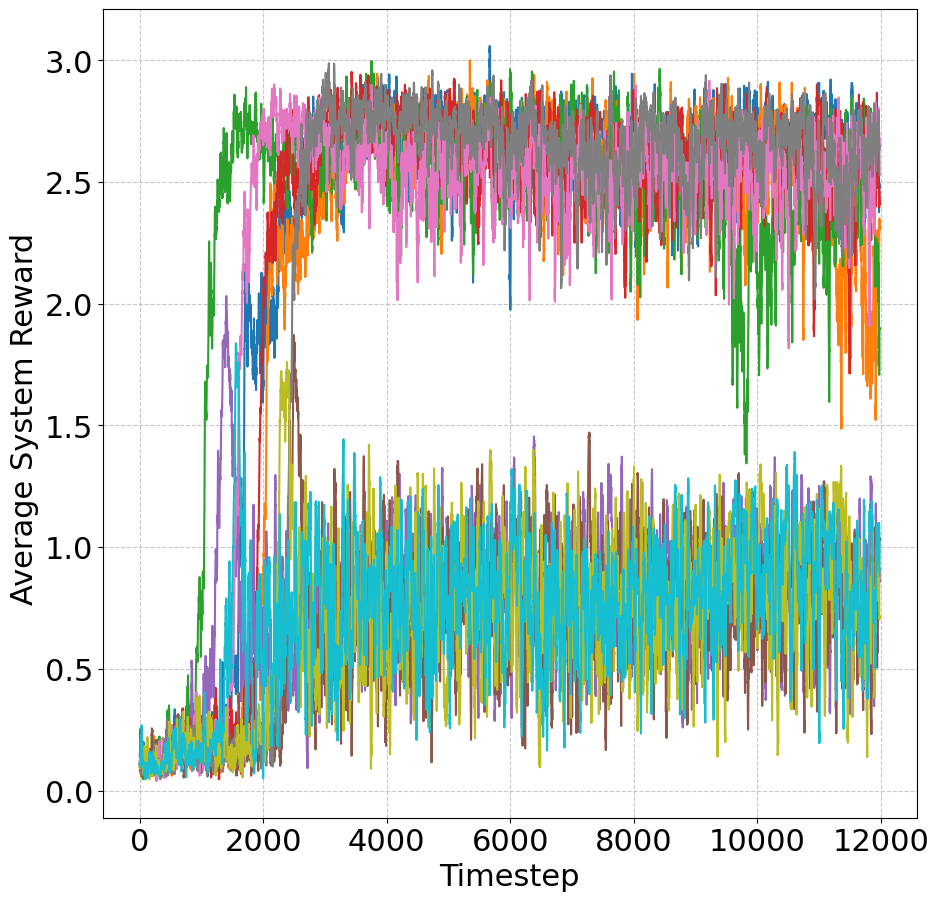

In [49]:
cum_rew_1 = np.load(f'data/base_comm/n{n3}t{t3}_cum_rew.npy')

for i in range(n1):
    plt.plot(moving_average(cum_rew_1[i,:],20))

fig = plt.gcf()
plt.xlabel('Timestep', fontsize=22)
plt.ylabel('Average System Reward ', fontsize=22)
plt.xticks(fontsize=22)  # Adjust the fontsize as needed
plt.yticks(fontsize=22)  # Adjust the fontsize as needed
fig.set_size_inches(10.5, 10.5)
plt.grid(True, linestyle='--', alpha=0.7)


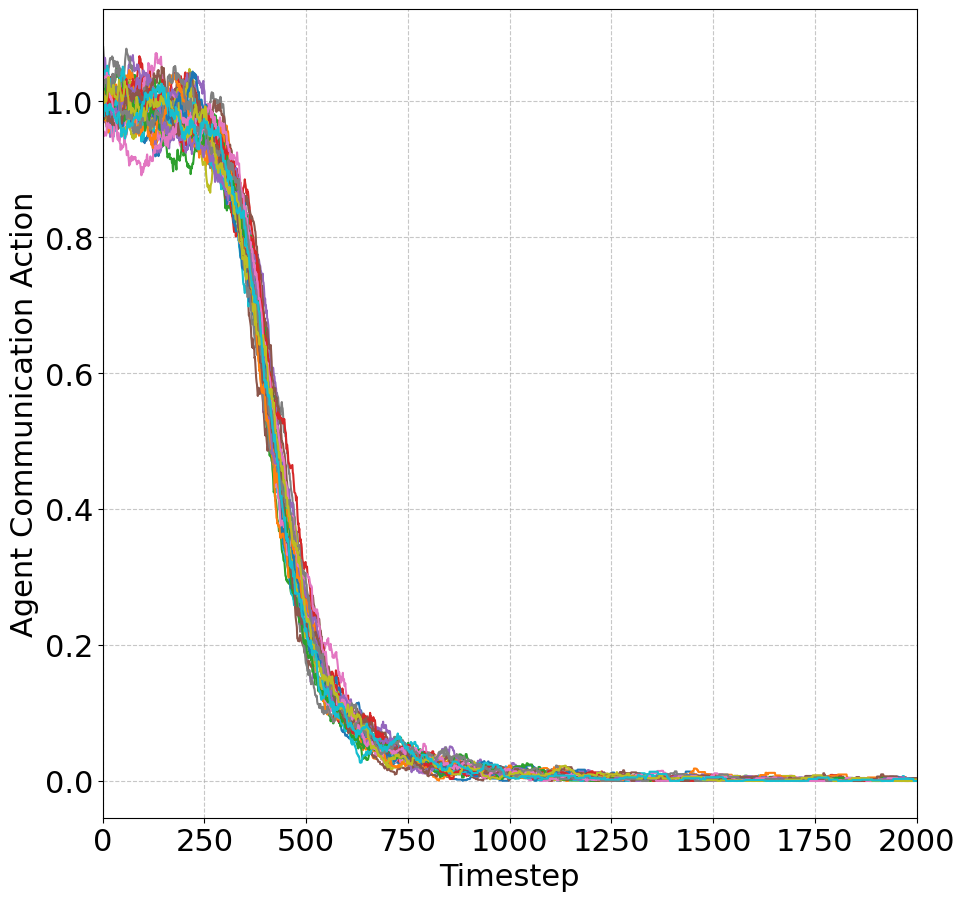

In [53]:

fig, ax_main = plt.subplots()
actions_3 = np.load(f'data/base_comm/n{n3}t{t3}_actions.npy')
avg = np.mean(actions_3, axis=0)

fig = plt.gcf()
ax_main.plot(moving_average(avg,50))
plt.xlabel('Timestep', fontsize=22)
plt.ylabel('Agent Communication Action', fontsize=22)
plt.xticks(fontsize=22)  # Adjust the fontsize as needed
plt.yticks(fontsize=22)  # Adjust the fontsize as needed
fig.set_size_inches(10.5, 10.5)
ax_main.set_xlim(0,2000)
plt.grid(True, linestyle='--', alpha=0.7)
